In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_palette("tab10")
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
metrics = pd.read_csv("df_metrics_siftsmall.csv")
metrics["total_bytes"] = metrics["compression_bytes"] + metrics["subvector_centroids_bytes"]
metrics

,n,c,compression_time,prediction_time,compression_bytes,subvector_centroids_bytes,recall,total_bytes
0,4,8,1.949213,0.044442,40000,131072,0.5830,171072
1,4,9,2.540228,0.091488,80000,262144,0.6293,342144
2,4,10,4.834902,0.088477,80000,524288,0.6700,604288
3,4,11,8.209285,0.121969,80000,1048576,0.7268,1128576
4,8,8,3.904984,0.097657,80000,131072,0.7020,211072
5,8,9,6.308787,0.123688,160000,262144,0.7360,422144
6,8,10,10.400325,0.131413,160000,524288,0.7785,684288
7,8,11,21.997271,0.189355,160000,1048576,0.8219,1208576
8,16,8,6.433168,0.140650,160000,131072,0.8050,291072
9,16,9,11.268823,0.197309,320000,262144,0.8442,582144


In [3]:
metrics_with_knn = metrics.append({'prediction_time':0.399, 'subvector_centroids_bytes':None, 'recall':1.0, 'total_bytes':5120000}, ignore_index = True)

Text(0.5, 1.0, 'Prediction Time vs. Recall')

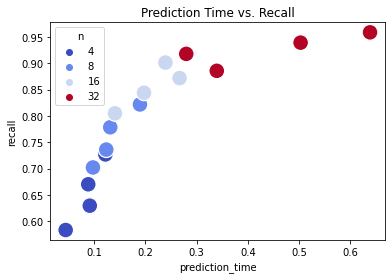

In [7]:
sns.scatterplot(data = metrics, x="prediction_time", y="recall", hue = "n", s = 250, palette=sns.color_palette("coolwarm", as_cmap=True)).set_title("Prediction Time vs. Recall")

Text(0.5, 1.0, 'Memory Usage vs. Recall')

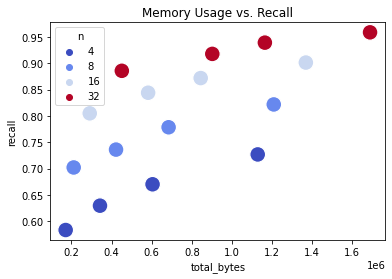

In [8]:
sns.scatterplot(data = metrics, x="total_bytes", y="recall", hue="n", s = 250, palette=sns.color_palette("coolwarm", as_cmap=True)).set_title("Memory Usage vs. Recall")

Text(0.5, 1.06, 'Prediction Time vs. Memory Usage vs. Recall')

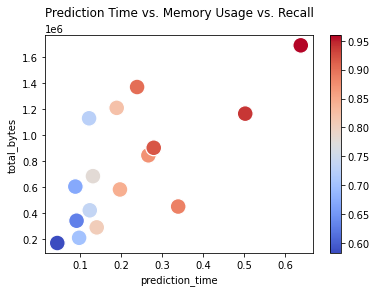

In [24]:
norm = plt.Normalize(metrics["recall"].min(), metrics["recall"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
tri_plot = sns.scatterplot(data = metrics, x="prediction_time", y="total_bytes", hue = "recall", palette=sns.color_palette("coolwarm", as_cmap=True), s=250)
tri_plot.legend_.remove()
tri_plot.figure.colorbar(sm)
tri_plot.set_title("Prediction Time vs. Memory Usage vs. Recall", y = 1.06)

Text(0.5, 1.06, 'Prediction Time vs. Memory Usage vs. Recall\n with k-NN Baseline')

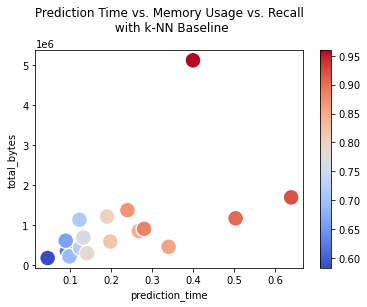

In [28]:
norm = plt.Normalize(metrics["recall"].min(), metrics["recall"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
tri_plot_with_knn = sns.scatterplot(data = metrics_with_knn, x="prediction_time", y="total_bytes", hue = "recall", palette=sns.color_palette("coolwarm", as_cmap=True), s=250)
tri_plot_with_knn.legend_.remove()
tri_plot_with_knn.figure.colorbar(sm)
plt.title("Prediction Time vs. Memory Usage vs. Recall\n with k-NN Baseline", y = 1.06)

<AxesSubplot:xlabel='prediction_time', ylabel='total_bytes'>

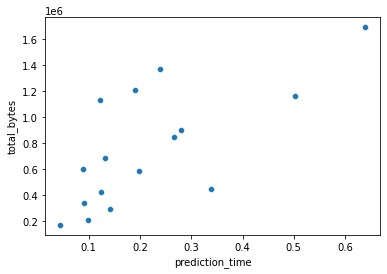

In [20]:
sns.scatterplot(data = metrics, x="prediction_time", y="total_bytes", hue="recall", )